# 0. Install dependencies

In [ ]:
!pip install prophet

# 1. Install libraries

In [1]:
# Importing necessary libraries
import pandas as pd
from prophet import Prophet

# 2. Read the csv file

In [5]:
# Reading in currency exchange rate data
exchange_rate_data = pd.read_csv('fx_fwd_rates_optimisation_data.csv')
exchange_rate_data

,currency,rate_type,length_in_months,date,rate
0,AUD,bid_rate,3,2016-10-03,0.765318
1,AUD,bid_rate,3,2016-10-04,0.760240
2,AUD,bid_rate,3,2016-10-05,0.760531
3,AUD,bid_rate,3,2016-10-06,0.756540
4,AUD,bid_rate,3,2016-10-07,0.755847
...,...,...,...,...,...
88000,ZMW,bid_rate,3,2021-12-27,0.057945
88001,ZMW,bid_rate,3,2021-12-28,0.057873
88002,ZMW,bid_rate,3,2021-12-29,0.057788
88003,ZMW,bid_rate,3,2021-12-30,0.057770


# 3. Loop over all the currencies and create a key for extracting the currency data

In [ ]:
columns = ['AUD', 'BGN', 'BHD', 'BRL', 'BWP', 'CAD', 'CHF', 'CLP', 'CNH', 'CNY', 'COP', 'CZK', 'DKK', 'EUR', 'GBP', 'GHS', 'HKD', 'HUF', 'IDR', 'ILS', 'INR', 'ISK', 'JOD', 'JPY', 'KES', 'KRW', 'KWD', 'MAD', 'MUR', 'MXN', 'MYR', 'NGN', 'NOK', 'NZD', 'OMR', 'PHP', 'PLN', 'QAR', 'RON', 'RSD', 'RUB', 'SAR', 'SEK', 'SGD', 'THB', 'TND', 'TRY', 'UGX', 'USD', 'XAF', 'XOF', 'ZAR', 'ZMW']

currency_rates = {}

# Loop over the currencies and filter the exchange rate data for each currency
for currency in columns:
    currency_rates[currency] = exchange_rate_data.loc[exchange_rate_data['currency'] == currency]


In [ ]:
# Loop over the currency columns and create a new variable for each one
for currency in columns:
    globals()[f"currency_rates_{currency}"] = exchange_rate_data.loc[exchange_rate_data['currency'] == currency]
    # print(currency)

# 4. Test code is on GBP, but feel free to optimise or change it

In [3]:
currency_rates_GBP = pd.read_csv('GBP_rates.csv')
currency_rates_GBP

,ds,y
0,2016-10-03,1.286728
1,2016-10-04,1.275050
2,2016-10-05,1.277098
3,2016-10-06,1.263653
4,2016-10-07,1.245397
...,...,...
1685,2021-12-27,1.341256
1686,2021-12-28,1.341977
1687,2021-12-29,1.347924
1688,2021-12-30,1.349099


In [ ]:
'''The ds = date and y = rate'''

# 5. Import the relevant country's interest rate


In [6]:
GBP_interest_rate = pd.read_csv('UK_Interest_Rate_INTGSBGBM193N.csv', parse_dates=[0])

In [15]:
data = currency_rates_GBP
data2 = GBP_interest_rate

In [8]:
GBP_interest_rate = GBP_interest_rate.rename(columns={GBP_interest_rate.columns[0]:'ds', GBP_interest_rate.columns[1]: 'interest_rate'})

In [9]:
GBP_interest_rate

,ds,interest_rate
0,1957-01-01,4.9100
1,1957-02-01,4.9300
2,1957-03-01,5.0800
3,1957-04-01,5.1100
4,1957-05-01,5.4300
...,...,...
783,2022-04-01,1.8362
784,2022-05-01,1.9069
785,2022-06-01,2.3824
786,2022-07-01,2.1454


In [16]:
# convert 'date' column in df1 to datetime64[ns]
data['ds'] = pd.to_datetime(data['ds'])

# concatenate the two dataframes
merged_df = pd.concat([data, data2], axis=1)

# drop duplicate 'date' column
merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]

# forward-fill missing values
merged_df.fillna(method='ffill', inplace=True)

In [17]:
merged_df

,ds,y,interest_rate
0,2016-10-03,1.286728,4.9100
1,2016-10-04,1.275050,4.9300
2,2016-10-05,1.277098,5.0800
3,2016-10-06,1.263653,5.1100
4,2016-10-07,1.245397,5.4300
...,...,...,...
1685,2021-12-27,1.341256,2.3278
1686,2021-12-28,1.341977,2.3278
1687,2021-12-29,1.347924,2.3278
1688,2021-12-30,1.349099,2.3278


In [18]:
# Prepare the data
merged_df['ds'] = pd.to_datetime(data['ds'])
merged_df = merged_df.rename(columns={'ds': 'ds', 'y': 'y', 'interest_rate': 'interest_rate'})
train_data = merged_df[data['ds'] < '2021-01-01']
test_data = merged_df[data['ds'] >= '2021-01-01']

In [19]:
train_data

,ds,y,interest_rate
0,2016-10-03,1.286728,4.9100
1,2016-10-04,1.275050,4.9300
2,2016-10-05,1.277098,5.0800
3,2016-10-06,1.263653,5.1100
4,2016-10-07,1.245397,5.4300
...,...,...,...
1320,2020-12-27,1.356131,2.3278
1321,2020-12-28,1.345895,2.3278
1322,2020-12-29,1.350212,2.3278
1323,2020-12-30,1.361404,2.3278


In [20]:
test_data

,ds,y,interest_rate
1325,2021-01-01,1.367834,2.3278
1326,2021-01-02,1.367834,2.3278
1327,2021-01-03,1.367834,2.3278
1328,2021-01-04,1.358389,2.3278
1329,2021-01-05,1.359845,2.3278
...,...,...,...
1685,2021-12-27,1.341256,2.3278
1686,2021-12-28,1.341977,2.3278
1687,2021-12-29,1.347924,2.3278
1688,2021-12-30,1.349099,2.3278


In [21]:
# Create the model with regressors
model = Prophet()
model.add_regressor('interest_rate')


In [22]:
# Fit the model
model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0oik3zk/hpervt0h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0oik3zk/cymjaklf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21410', 'data', 'file=/tmp/tmpu0oik3zk/hpervt0h.json', 'init=/tmp/tmpu0oik3zk/cymjaklf.json', 'output', 'file=/tmp/tmpu0oik3zk/prophet_modelsv1ivins/prophet_model-20230219123820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:38:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
# Make predictions
future_data = model.make_future_dataframe(periods=90)

In [24]:
future_data

,ds
0,2016-10-03
1,2016-10-04
2,2016-10-05
3,2016-10-06
4,2016-10-07
...,...
1410,2021-03-27
1411,2021-03-28
1412,2021-03-29
1413,2021-03-30


In [26]:
future_data['interest_rate'] = train_data['interest_rate']
future_data

,ds,interest_rate
0,2016-10-03,4.91
1,2016-10-04,4.93
2,2016-10-05,5.08
3,2016-10-06,5.11
4,2016-10-07,5.43
...,...,...
1410,2021-03-27,NaN
1411,2021-03-28,NaN
1412,2021-03-29,NaN
1413,2021-03-30,NaN


# 6. Fill in the NA from interest rate through mean of train_data

In [27]:
mean_interest_rate = train_data['interest_rate'].mean()
future_data['interest_rate'].fillna(mean_interest_rate, inplace=True)

In [28]:
future_data

,ds,interest_rate
0,2016-10-03,4.910000
1,2016-10-04,4.930000
2,2016-10-05,5.080000
3,2016-10-06,5.110000
4,2016-10-07,5.430000
...,...,...
1410,2021-03-27,5.161459
1411,2021-03-28,5.161459
1412,2021-03-29,5.161459
1413,2021-03-30,5.161459


In [29]:
forecast = model.predict(future_data)

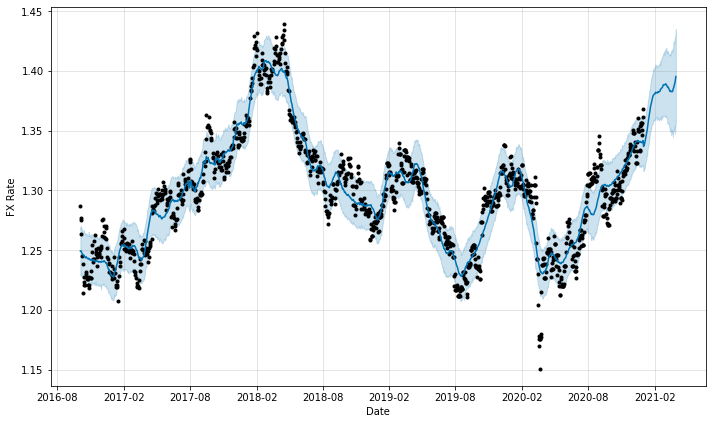

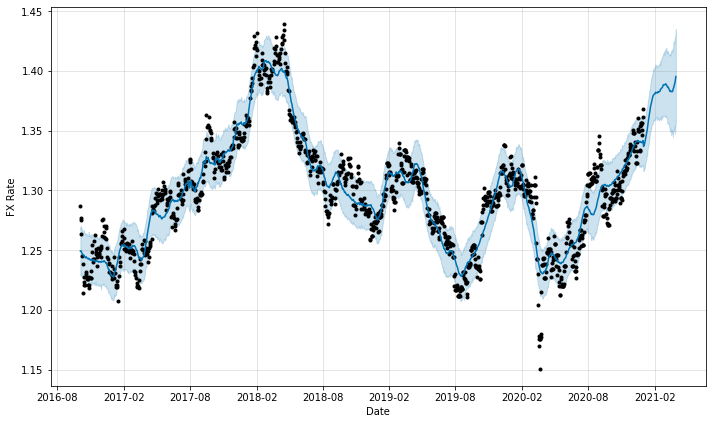

In [30]:
# Plot the results
model.plot(forecast, xlabel='Date', ylabel='FX Rate')



In [31]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data['y'], forecast[-365:]['yhat'])
print('MAE: {:.2f}'.format(mae))

MAE: 0.08


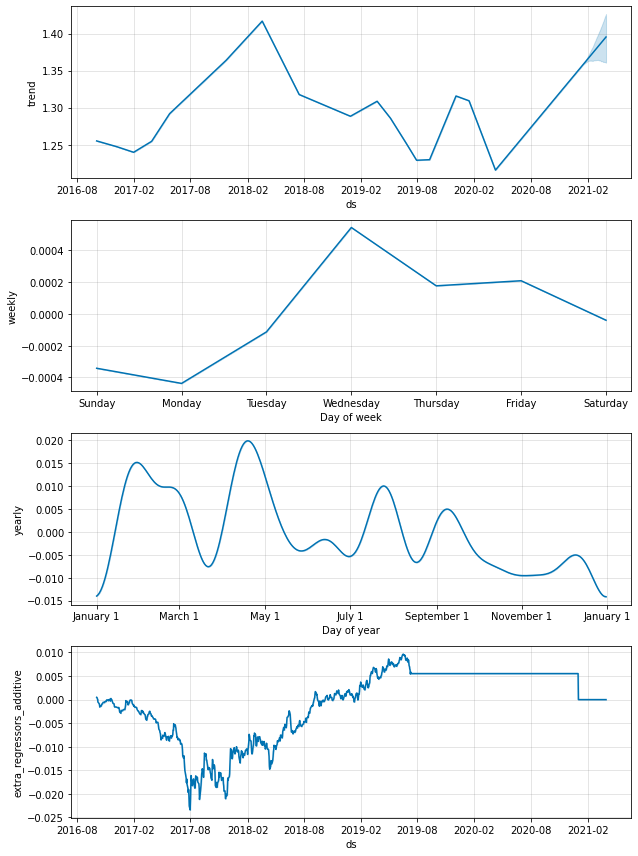

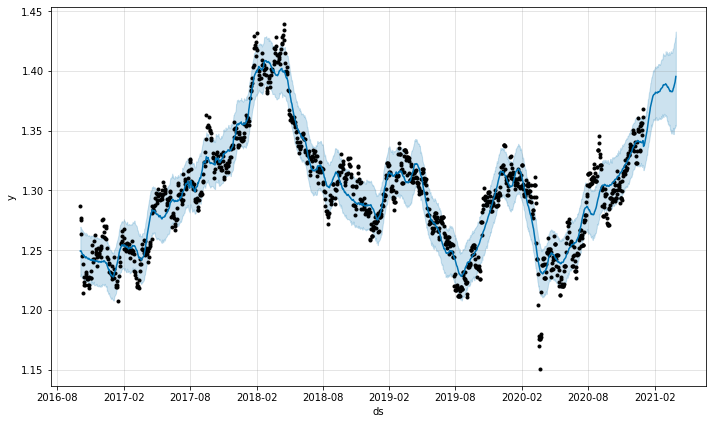

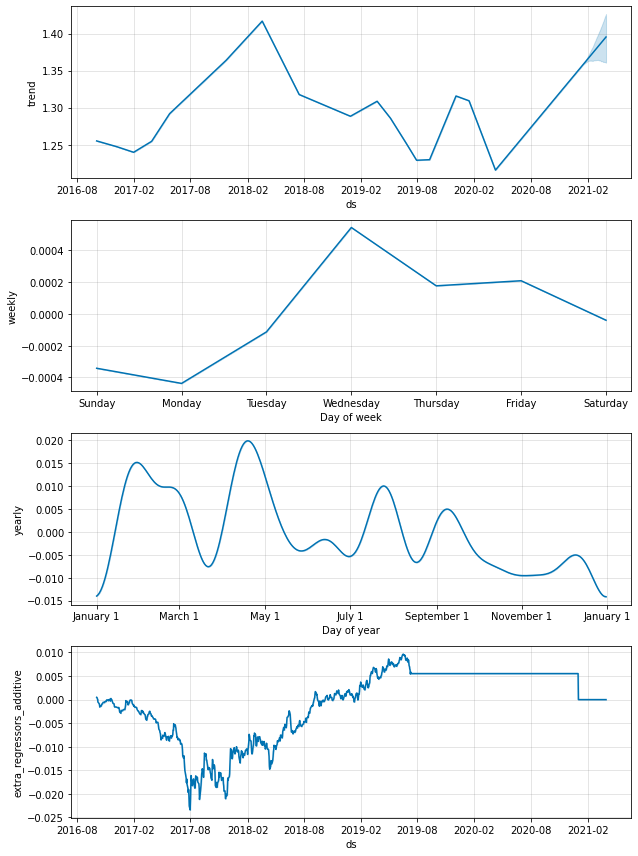

In [32]:
# Generating forecasts
forecast = model.predict(future_data)

# Plotting forecasts
model.plot(forecast)
model.plot_components(forecast)